In [1]:
import pandas as pd
import scipy as sp
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pltd 
import numpy as np

In [2]:
chicago = pd.read_csv('Chicago Data Cleanedup.csv')

In [3]:
chicago.shape

(2547431, 86)

In [4]:
chicago.head()

,Unnamed: 0,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,...,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Closest Station,Income
0,62200,11626027,03/16/2019 05:58:00 PM,001XX N WELLS ST,0460,SIMPLE,STREET,42.0,32.0,08B,...,0,0,0,1,0,0,0,0,1.457263,13500.0
1,62540,11622422,03/12/2019 10:00:00 PM,008XX E 38TH PL,0820,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),4.0,36.0,06,...,0,0,0,0,0,0,1,0,2.035700,40400.0
2,62572,11625922,03/14/2019 06:42:00 PM,074XX N PAULINA ST,0460,SIMPLE,RESIDENCE,49.0,1.0,08B,...,0,0,0,0,0,1,0,0,1.160838,27500.0
3,62646,11626065,03/16/2019 03:16:00 PM,069XX W FARRAGUT AVE,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,41.0,10.0,08B,...,0,0,0,1,0,0,0,0,1.771637,39500.0
4,63098,11647322,04/07/2019 04:08:00 AM,001XX W CONGRESS PKWY,051A,AGGRAVATED: HANDGUN,STREET,25.0,32.0,04A,...,0,0,0,0,1,0,0,0,1.231120,13500.0


In [5]:
chicago.drop(["Unnamed: 0"], axis="columns", inplace=True)

In [6]:
# % of type of crime happening in Chicago
chicago_crime_type = chicago.groupby(['Primary Type'])['Primary Type'].count()/len(chicago)*100
chicago_crime_type.sort_values(ascending=False, inplace=True)
print(chicago_crime_type)

Primary Type
THEFT                               23.696186
BATTERY                             19.851764
CRIMINAL DAMAGE                     11.641925
NARCOTICS                            9.384631
ASSAULT                              6.984213
BURGLARY                             6.264861
MOTOR VEHICLE THEFT                  4.917425
DECEPTIVE PRACTICE                   4.805233
ROBBERY                              4.218367
CRIMINAL TRESPASS                    2.356452
WEAPONS VIOLATION                    1.550425
PUBLIC PEACE VIOLATION               0.871937
OFFENSE INVOLVING CHILDREN           0.821769
PROSTITUTION                         0.572930
CRIM SEXUAL ASSAULT                  0.474674
INTERFERENCE WITH PUBLIC OFFICER     0.441582
SEX OFFENSE                          0.352826
GAMBLING                             0.165108
ARSON                                0.159258
HOMICIDE                             0.146893
LIQUOR LAW VIOLATION                 0.122555
KIDNAPPING           

Text(0, 0.5, 'Crime Type Rate (%)')

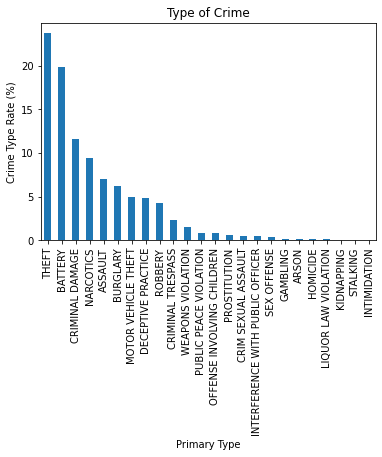

In [7]:
chicago_crime_type.plot(kind='bar', title='Type of Crime')
plt.ylabel('Crime Type Rate (%)')

The top 3 crimes occur about half the time compared to other crimes.

In [8]:
chicago_crime_location = chicago.groupby(['Location Description'])['Location Description'].count()/len(chicago)*100
chicago_crime_location.sort_values(ascending=False, inplace=True)
print(chicago_crime_location)

Location Description
STREET                            25.456980
RESIDENCE                         15.984928
APARTMENT                         13.366721
SIDEWALK                          11.783204
OTHER                              3.896828
PARKING LOT/GARAGE(NON.RESID.)     3.291826
ALLEY                              2.411842
SMALL RETAIL STORE                 2.341418
RESIDENTIAL YARD (FRONT/BACK)      2.248187
RESTAURANT                         2.161668
RESIDENCE-GARAGE                   1.999465
RESIDENCE PORCH/HALLWAY            1.966530
SCHOOL, PUBLIC, BUILDING           1.920170
VEHICLE NON-COMMERCIAL             1.906902
DEPARTMENT STORE                   1.686209
GROCERY FOOD STORE                 1.303784
GAS STATION                        1.269161
PARK PROPERTY                      0.900044
BAR OR TAVERN                      0.788991
CTA TRAIN                          0.629654
COMMERCIAL / BUSINESS OFFICE       0.577641
CONVENIENCE STORE                  0.558013
CTA PLATFOR

Text(0, 0.5, 'Crime Location Rate (%)')

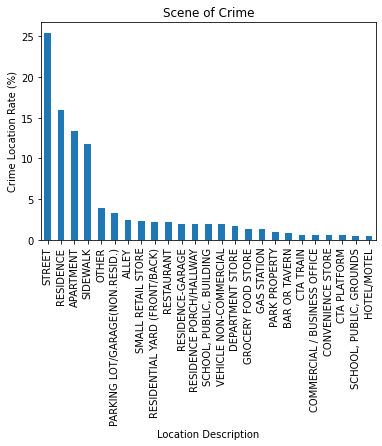

In [9]:
chicago_crime_location.plot(kind= 'bar', title='Scene of Crime')
plt.ylabel('Crime Location Rate (%)')

The top 4 crime locations are about where 60% of the crimes happen. 

In [10]:
from datetime import datetime
format = '%m/%d/%Y %I:%M:%S %p'
chicago['time_hour'] = chicago.Date.apply(lambda row: datetime.strptime(row, format).strftime('%H'))
chicago['month'] = chicago.Date.apply(lambda row: datetime.strptime(row, format).strftime('%m'))

In [11]:
chicago_time = chicago.groupby(['time_hour'])['time_hour'].count()/len(chicago)*100
print(chicago_time)

time_hour
00    5.003040
01    3.170213
02    2.699504
03    2.212229
04    1.680046
05    1.422688
06    1.653352
07    2.339337
08    3.392712
09    4.320981
10    4.241135
11    4.496530
12    5.634029
13    4.717930
14    5.040490
15    5.421658
16    5.155861
17    5.216039
18    5.648436
19    5.842906
20    5.626139
21    5.343854
22    5.340792
23    4.380099
Name: time_hour, dtype: float64


Text(0, 0.5, 'Hour Crime Rate (%)')

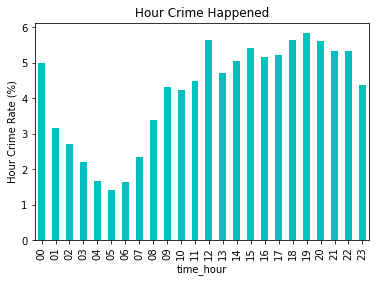

In [16]:
chicago_time.plot(kind='bar', title='Hour Crime Happened', color='c')
plt.ylabel('Hour Crime Rate (%)')

The hour a crime occured happens significantly more at night than it does between 2 and 6 in the morning.

In [17]:
crime_weekday = chicago[['Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday', 'Weekday_Friday', 'Weekday_Saturday','Weekday_Sunday']].sum()/len(chicago)*100
print(crime_weekday)

Weekday_Monday       14.057967
Weekday_Tuesday      14.071274
Weekday_Wednesday    14.162425
Weekday_Thursday     14.108645
Weekday_Friday       15.024352
Weekday_Saturday     14.592427
Weekday_Sunday       13.982911
dtype: float64


Text(0, 0.5, 'Crime Weekday Rate (%)')

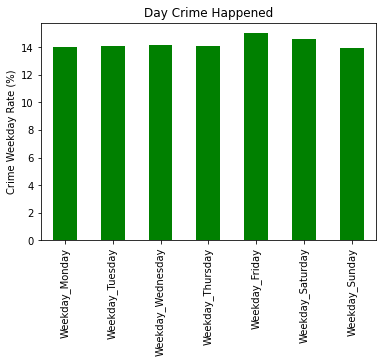

In [20]:
crime_weekday.plot(kind='bar', title= 'Day Crime Happened', color = 'g')
plt.ylabel('Crime Weekday Rate (%)')

Not much of difference here but slightly higher on weekends.

In [19]:
crime_month = chicago.groupby(['month'])['month'].count()/ len(chicago) * 100
print(crime_month)

month
01    7.720837
02    6.676098
03    8.139573
04    8.146678
05    9.014650
06    9.076360
07    9.438332
08    9.334502
09    8.622648
10    8.538210
11    7.754989
12    7.537123
Name: month, dtype: float64


Text(0, 0.5, 'Crime Month Rate (%)')

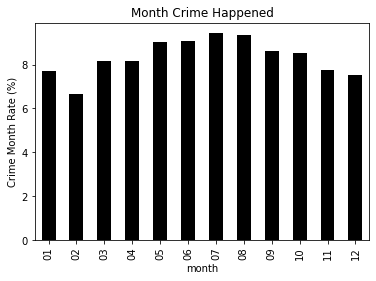

In [23]:
crime_month.plot(kind = 'bar', title = 'Month Crime Happened', color = 'k')
plt.ylabel('Crime Month Rate (%)')

No surprise here. Crimes are way likely to happen during the summer. Chicago has sub-freezing cold temperature in the winter and that is why you see such a drop in February. 

In [24]:
def fourmajorcrimes(row):
    keep = ['THEFT', 'BATTERY',  'NARCOTICS', 'CRIMINAL DAMAGE']
    if row not in keep:
        return 'OTHERS'
    else:
        return row

In [25]:
chicago['New_Type'] = chicago['Primary Type'].apply(fourmajorcrimes)

In [29]:
# Writing a function to see the crime type by location percentage of the top 4 versus the 'others' 
def plotsplit(cnam, title): 
    datasplit = chicago.groupby([cnam, 'New_Type'])[cnam].count().unstack()
    # Converting everything to a percentage
    datasplit= datasplit.apply(lambda c: c / c.sum() * 100, axis = 1)
    datasplit = datasplit[['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHERS']]
    datasplit.plot(kind = 'bar', stacked = True, title = title)
    plt.ylabel('% of Crime Type')
    plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True, shadow=True)
    plt.ylim([0, 120])

In [27]:
pltd.rcParams['figure.figsize'] = (13, 10)

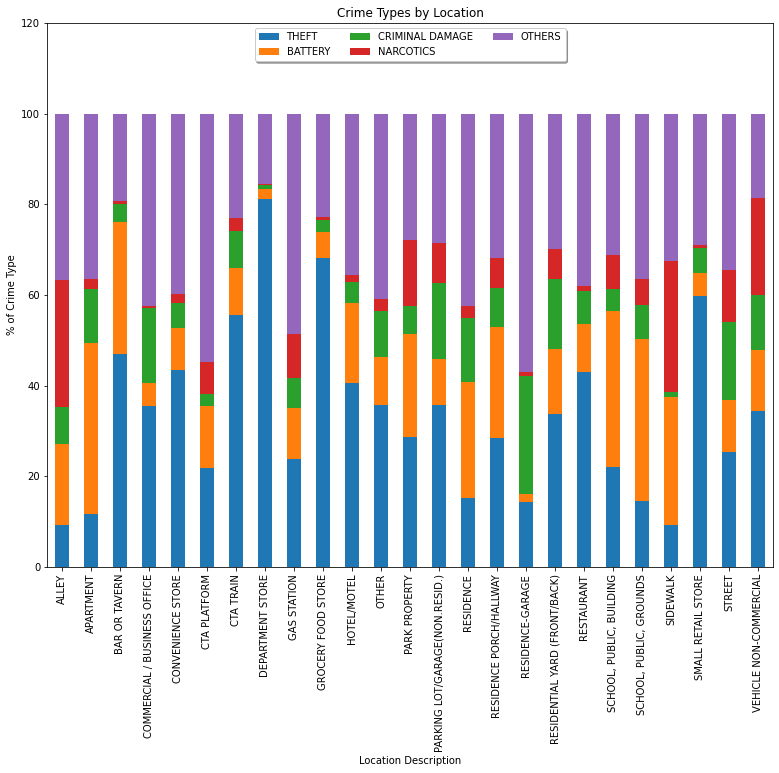

In [30]:
plotsplit('Location Description', 'Crime Types by Location')

It seems that most "other" crimes happen on the CTA platform, residences, residence garages, gas stations. Theft is most likely to happen on the CTA Train, department stores, grocery stores, small retail stores, and restaurants. Battery is most likely to happen in residence, bars, apartments, and public schools. Most narcotic crimes happen in alleys, sidewalks, and non-commerical vehicles. 

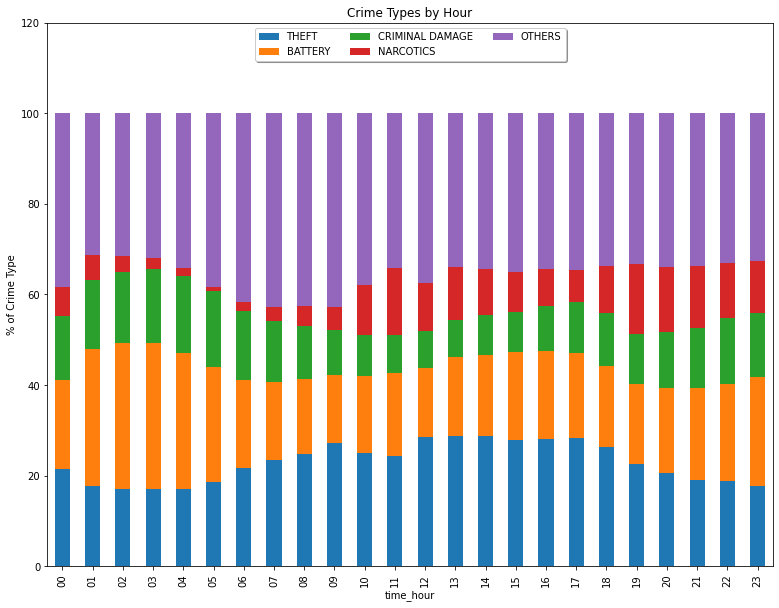

In [31]:
plotsplit('time_hour', 'Crime Types by Hour')

Biggest thing to note here is that battery is more likely to happen when its dark out and theft happens more likely in the day, particularly the afternoon. 

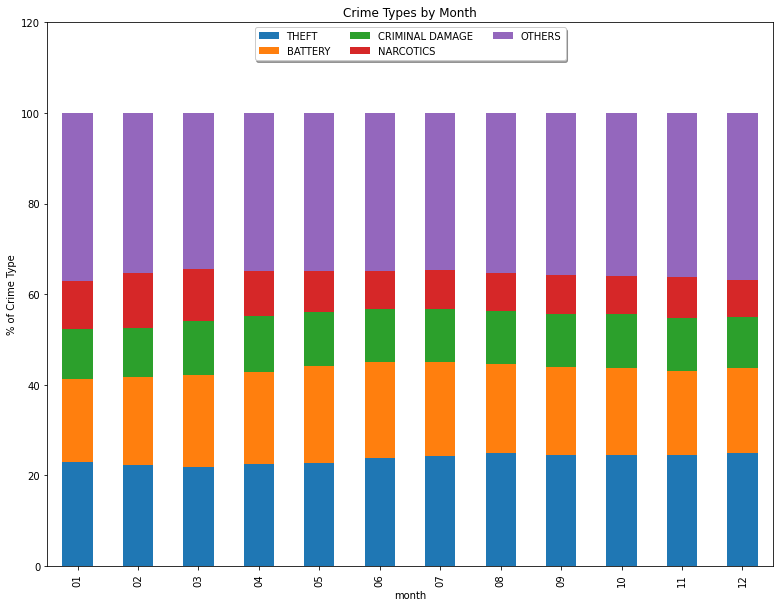

In [36]:
plotsplit('month', 'Crime Types by Month')

Results here is that crime type does not vary by month. 

In [51]:
len(chicago['Year'])

2547431

In [52]:
chicago_year = chicago.groupby('Year')['Year'].count()
chicago_year.sort_values(ascending=False, inplace =True)
chicago_year

Year
2010    322247
2011    306385
2012    293281
2013    265433
2014    236527
2016    229021
2017    226827
2018    225515
2015    221706
2019    220489
Name: Year, dtype: int64

Text(0, 0.5, 'Crime Occurence that Year')

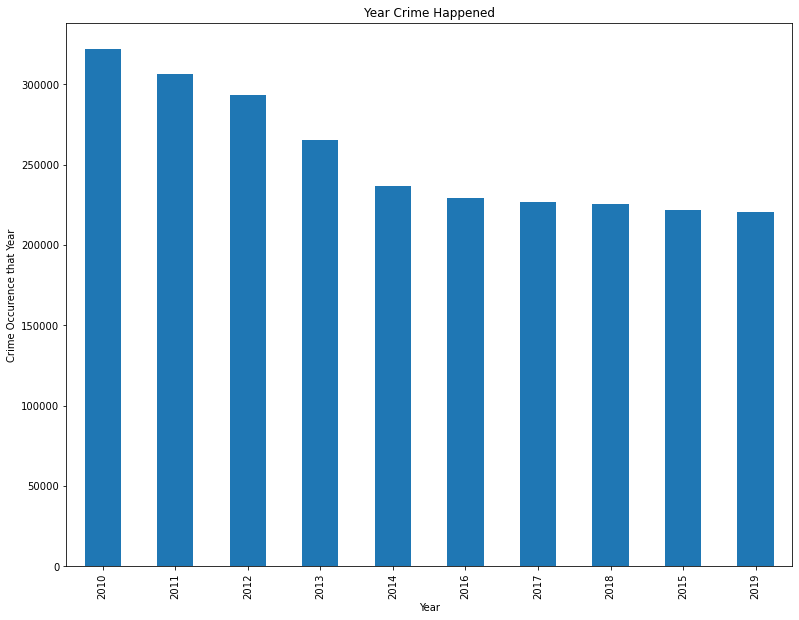

In [57]:
chicago_year.plot(kind='bar', title= 'Year Crime Happened')
plt.ylabel('Crime Occurence that Year')

This is positive news! It is worth noting while crime is still prevalent it has gone down significantly over the past 10 years. 

In [58]:
hardship = pd.read_csv('hardship_index.csv')

In [59]:
hardship.head()

,HARDSHIP INDEX,COMMUNITY AREA NAME,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME
0,39.0,Rogers Park,23.6,18.2,8.7,27.5,23939
1,46.0,West Ridge,17.2,20.8,8.8,38.5,23040
2,20.0,Uptown,24.0,11.8,8.9,22.2,35787
3,17.0,Lincoln Square,10.9,13.4,8.2,25.5,37524
4,6.0,North Center,7.5,4.5,5.2,26.2,57123


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,77,-0.849167,"[-0.9, -0.77]",0.721085,0.713547,1.725781e-22,2.584e+19,1.0


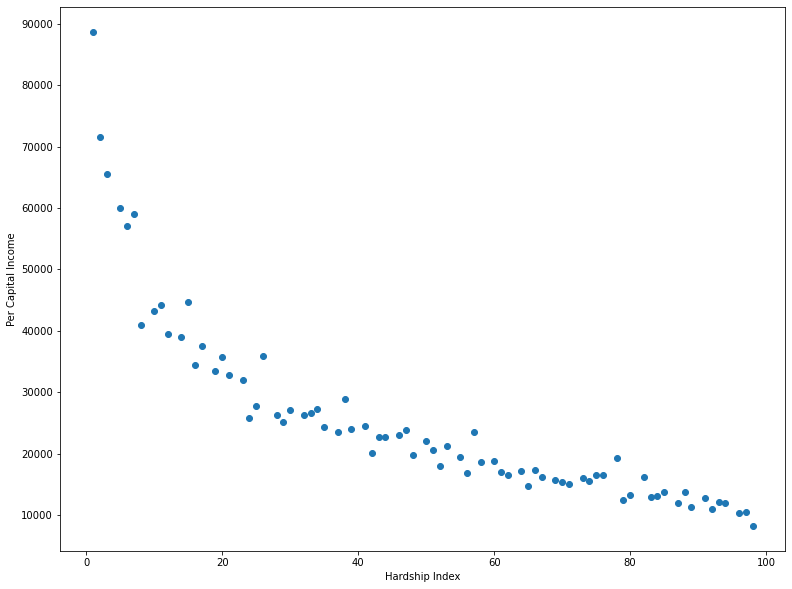

In [78]:
x = hardship['HARDSHIP INDEX']
y = hardship['PER CAPITA INCOME ']
plt.xlabel('Hardship Index')
plt.ylabel('Per Capital Income')

plt.scatter(x, y, marker='o')
import pingouin as pg
pg.corr(x=hardship['HARDSHIP INDEX'], y=hardship['PER CAPITA INCOME '])

We can see here that the higher the hardship index the lower the per capita income. Not only can you see this visually, but I did a Pearson's correlation that shows it is negatively correlated by 84.9%

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,77,0.802538,"[0.71, 0.87]",0.644068,0.634448,1.704910e-18,3.507e+15,1.0


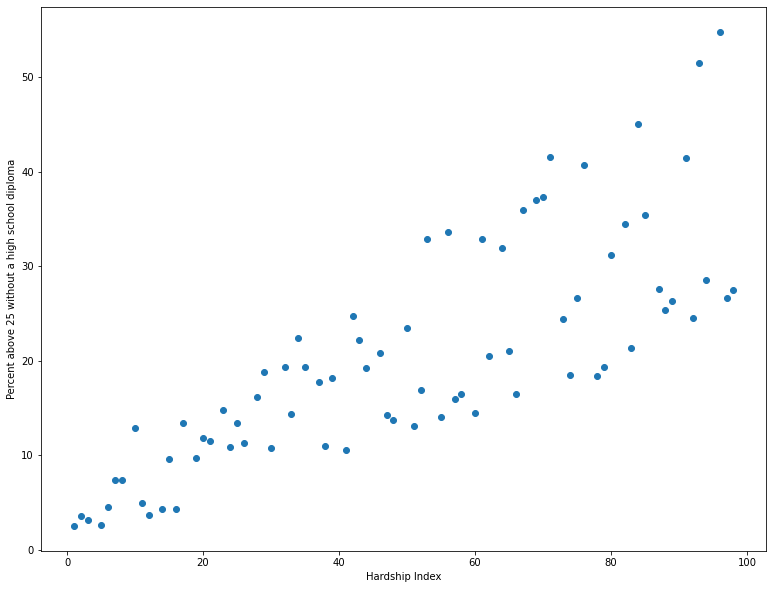

In [79]:
x = hardship['HARDSHIP INDEX']
y = hardship['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']
plt.xlabel('Hardship Index')
plt.ylabel('Percent above 25 without a high school diploma')

plt.scatter(x, y, marker='o')
pg.corr(x=hardship['HARDSHIP INDEX'], y=hardship['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'])

We can see here the higher the hardship index, the higher percent chance you do not have a high school diploma above the age of 25. It is correlated highly at 80%.

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,77,0.792294,"[0.69, 0.86]",0.627729,0.617668,9.289744e-18,6.809e+14,1.0


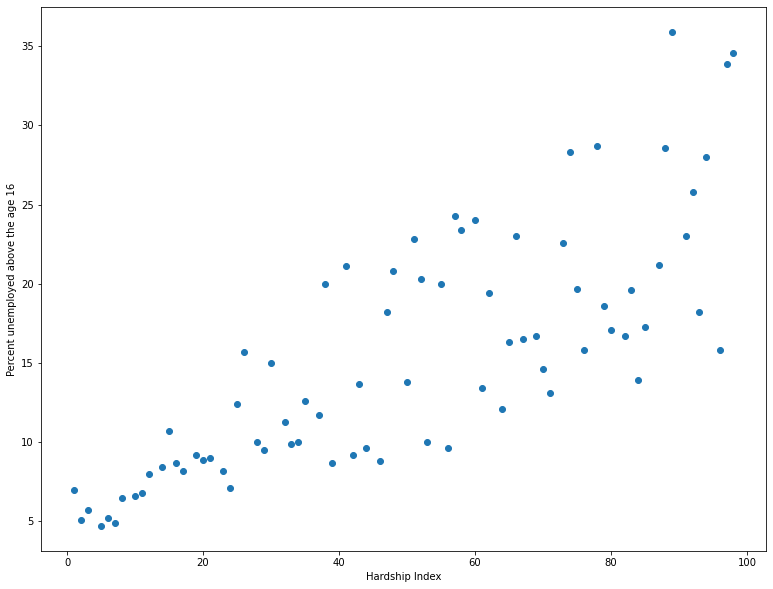

In [80]:
x = hardship['HARDSHIP INDEX']
y = hardship['PERCENT AGED 16+ UNEMPLOYED']
plt.xlabel('Hardship Index')
plt.ylabel('Percent unemployed above the age 16')

plt.scatter(x, y, marker='o')
pg.corr(x=hardship['HARDSHIP INDEX'], y=hardship['PERCENT AGED 16+ UNEMPLOYED'])

Similarly to the last scatterplot, hardship and unemployment is positively correlated at 79%.

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,77,0.690844,"[0.55, 0.79]",0.477266,0.463138,3.573894e-12,2.807e+09,1.0


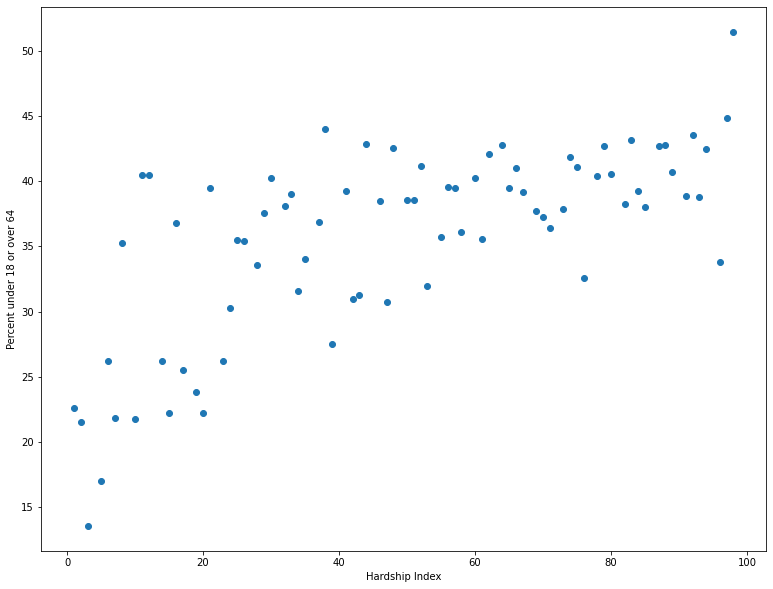

In [81]:
x = hardship['HARDSHIP INDEX']
y = hardship['PERCENT AGED UNDER 18 OR OVER 64']
plt.xlabel('Hardship Index')
plt.ylabel('Percent under 18 or over 64')

plt.scatter(x, y, marker='o')
pg.corr(x=hardship['HARDSHIP INDEX'], y=hardship['PERCENT AGED UNDER 18 OR OVER 64'])

While it is not as strongly correlated. There is a positive relationship among the hardship index and a person being under 18 or over 64. 

###  We have now explored our data which we will then go into further details using machine learning models to classify our data. 